In [189]:
import os
import pandas as pd
import tarfile
from urllib.request import urlretrieve

## Load Data

In [190]:
# Data camp style
#https://campus.datacamp.com/courses/intermediate-importing-data-in-python/importing-data-from-the-internet-1?ex=2
# so eta ei link theke data ta niye ei python ei show korbe, locally ar save korbe na 

#URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv" # when I Click on download then with the link a new word 'raw' also added

#urlretrieve(URL,'Housing.csv')

#df = pd.read_csv('Housing.csv')
#print(df.head())


In [191]:
URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"

HOUSING_PATH = os.path.join("datasets", "housing")

#this os.path.join() just  add this two words  ("datasets", "housing") 




In [192]:
HOUSING_PATH

'datasets\\housing'

In [193]:
# to know  my current working directory we use os.getcwd() 'get current working directory'
os.getcwd() 

'E:\\DS\\My various Projects\\Hands ON ML\\2. End to End ML projects\\datasets\\housing'

In [194]:
def fetch_housing_data(housing_url=URL, housing_path=HOUSING_PATH):
    
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path) # ami je working directory te juoyter notebook run korchi, okhane ei "datasets" folder open korbe then "housing" folder khulbe 
        # so tar mane amar  path holo ekhon 'E:\DS\My various Projects\Hands ON ML\2. End to End ML projects\datasets\housing'
    
    tgz_path = os.path.join(housing_path, "housing.tgz") #ei path 'E:\DS\My various Projects\Hands ON ML\2. End to End ML projects\datasets\housing' e "housing.tgz" file ti jabe
    
     # so tgz_path mane holo 'E:\DS\My various Projects\Hands ON ML\2. End to End ML projects\datasets\housing\housing.tgz'
    
    urlretrieve(housing_url, tgz_path) # so url theke download hoye ei pathe  'E:\DS\My various Projects\Hands ON ML\2. End to End ML projects\datasets\housing' jabe
    
    housing_tgz = tarfile.open(tgz_path) # eta ekti tgz file eke open korbo tarfile.open() diye, ar tgz file ti pabo ei path e 'E:\DS\My various Projects\Hands ON ML\2. End to End ML projects\datasets\housing\housing.tgz'
    
    housing_tgz.extractall(path=housing_path) # tgz file ti kind of zip file eke ekhon extract korbo ei  extractall() diye
    
    housing_tgz.close()

In [195]:
fetch_housing_data() # ekhon ei function ti run korle eta amar working directory te ei file ti download kore rakhbe

In [196]:
def load_housing_data(housing_path=HOUSING_PATH):
    
    csv_path = os.path.join(housing_path, "housing.csv") # amar fetch_housing_data() call korle file ti download hobe ar extract hobe
    # but er kono csv file nei, so amra ekti csv file korbo er 
    
    return pd.read_csv(csv_path) #ar csv file ti open/ read korbo 

In [197]:
housing= load_housing_data()

## Explore data before spling test and train

In [198]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [199]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [200]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Why matplotlib inline is used


https://pythonguides.com/what-is-matplotlib-inline/#:~:text=Why%20matplotlib%20inline%20is%20used,-You%20can%20use&text=It%20provides%20interactivity%20with%20the,means%20it%20separates%20different%20plots.

You can use the magic function %matplotlib inline to enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written.

It provides interactivity with the backend in the frontends like the jupyter notebook. It also provides the feature where, the plotting commands below the output cell of the previous plot, will not affect the previous plot, which means it separates different plots.

For example, changing the color palette by colormap in the cell below the previous plot output cell will not change the colormap of that plot.

NOTE – If you are not in the interactive mode and using matplotlib for plotting graphs, then the graph will only appear if you call the matplotlib.pyplot.show() function in previous versions of jupyter notebook.

In the current versions of the IPython notebook and jupyter notebook, it is not necessary to use the %matplotlib inline function. As, whether you call matplotlib.pyplot.show() function or not, the graph output will be displayed in any case.

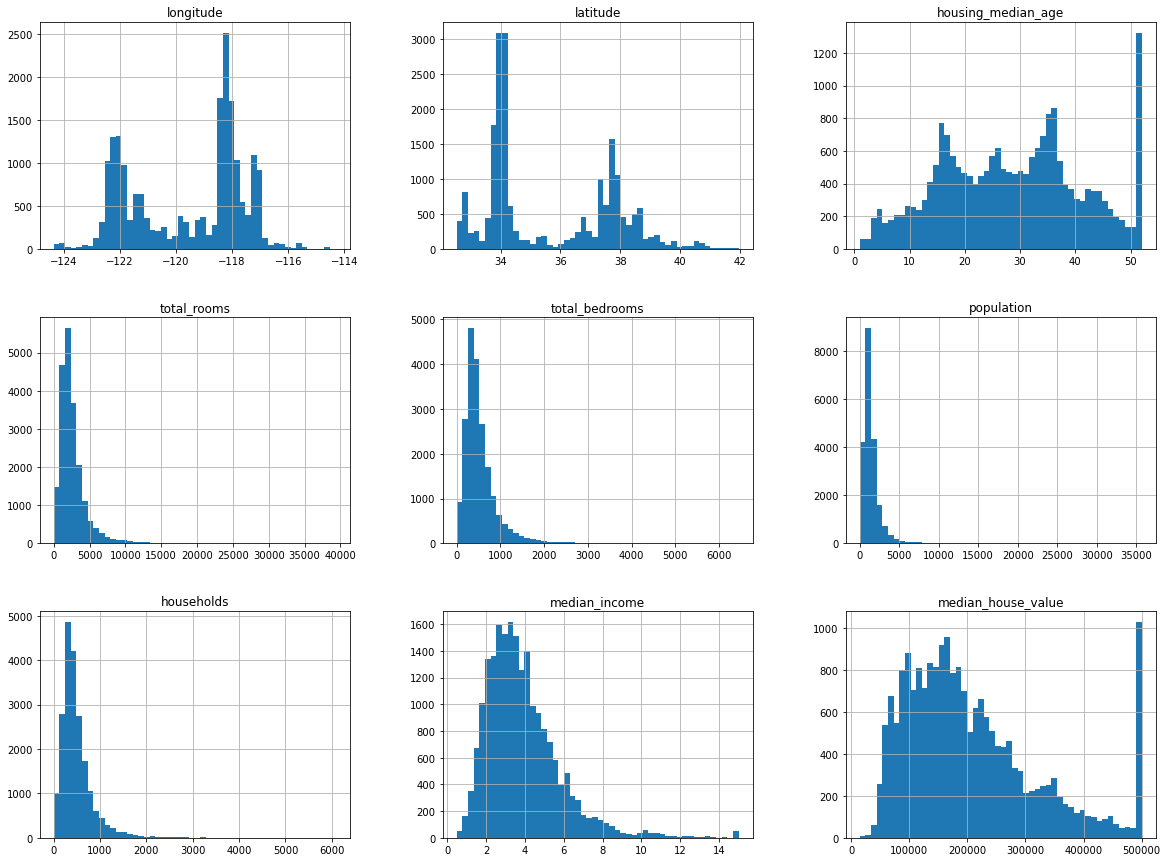

In [201]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins= 50, figsize=(20,15))
plt.show()

## Split the data into train and test

In [202]:
from sklearn.model_selection import train_test_split


In [203]:
#X=housing.drop('median_house_value', axis=True)

#y=housing['median_house_value']



In [204]:
train_set, test_set= train_test_split(housing, test_size=0.2, random_state= 42)

In [205]:
train_set.shape

(16512, 10)

In [206]:
test_set.shape

(4128, 10)

<AxesSubplot:>

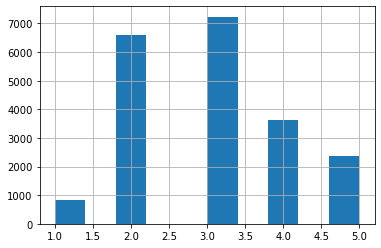

In [207]:
import numpy as np
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [208]:
from sklearn.model_selection import  StratifiedShuffleSplit


In [209]:
split= StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [210]:
print(strat_train_set['income_cat'].value_counts())
print(strat_test_set['income_cat'].value_counts())
# look jekhane jekhane train er data kom sejhane test er data kom , ar jekhane beshi sekhane beshi. so result is as my expected

3    5789
2    5265
4    2911
5    1889
1     658
Name: income_cat, dtype: int64
3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64


In [211]:
# I  do not need that  ['income_cat'], so need to drop it 
for set in (strat_train_set, strat_test_set):
    set.drop('income_cat', axis=1, inplace= True)

In [212]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [213]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


## Playing with the training dataset /Exploring the data/EDA


In [214]:
# make have a copy of our traing dataset so i can play with it without harming it 

housing= strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

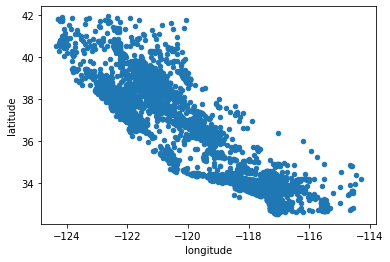

In [215]:
housing.plot(kind= "scatter", x= 'longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

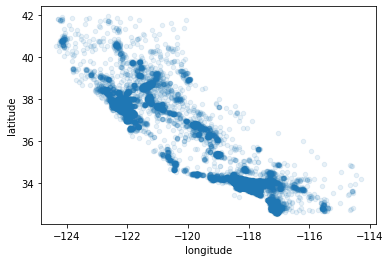

In [216]:
housing.plot(kind= "scatter", x= 'longitude', y='latitude', alpha= 0.1)

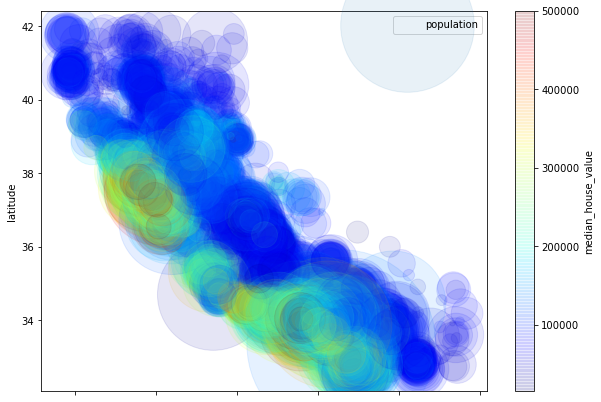

In [217]:
housing.plot(kind= "scatter", x= 'longitude', y='latitude', alpha= 0.1,
            s=housing['population'], c='median_house_value', cmap=plt.get_cmap('jet'),colorbar=True,
            label='population', figsize=(10,7)) 
plt.legend()

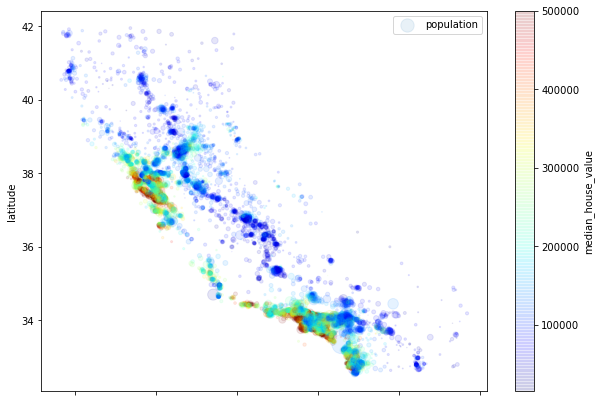

In [218]:
# 's' a population dewate eto boro circle, so normalize it 
housing.plot(kind= "scatter", x= 'longitude', y='latitude', alpha= 0.1,
            s=housing['population']/100, c='median_house_value', cmap=plt.get_cmap('jet'),colorbar=True,
            label='population', figsize=(10,7)) 
plt.legend()

In [219]:
corelations= housing.corr()

In [220]:
import seaborn as sns

<AxesSubplot:>

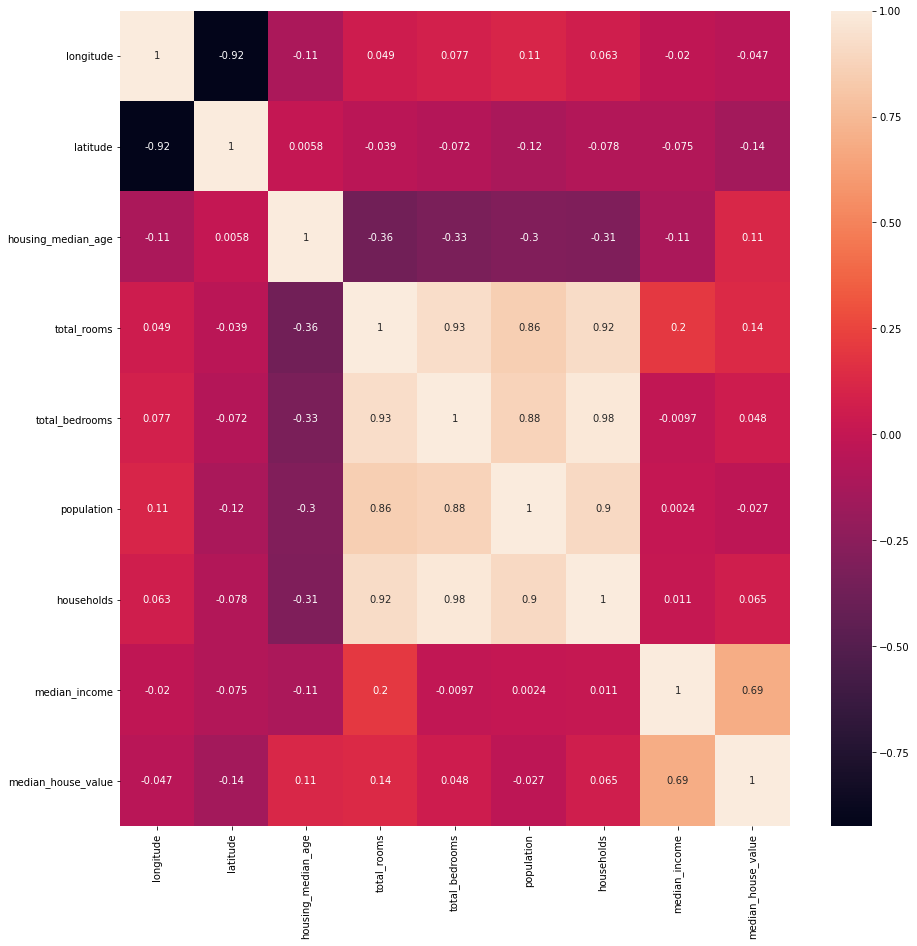

In [221]:
plt.figure(figsize=(15,15))
sns.heatmap(corelations, annot=True)

In [222]:
#zoomin in one feature
corelations['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

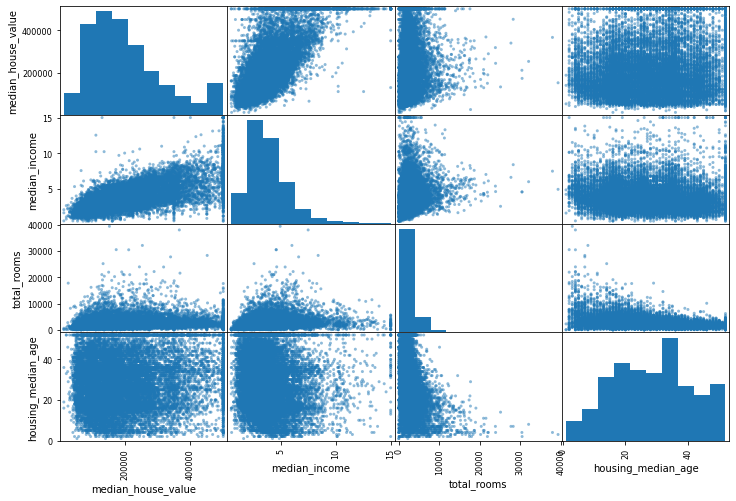

In [223]:
# anothe great plot to show the corelations
from pandas.plotting import scatter_matrix
list_col=['median_house_value','median_income', 'total_rooms', 'housing_median_age' ]
scatter_matrix(housing[list_col], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

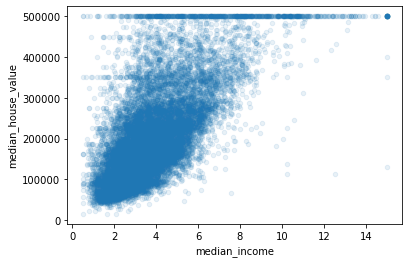

In [224]:
#zoomin one promising  correlation
housing.plot(kind='scatter', x='median_income', y='median_house_value' , alpha=0.1)

# see there are some horizontal line of dots, these are have almost zero corelations . need to treat it later.

In [225]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


## Combinig some attribute so  gain some insights


In [226]:
# create some column so feature engineering 
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [227]:
corr_matrix= housing.corr()

In [228]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [229]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Separating Predictor and label data

In [230]:
housing= strat_train_set.drop('median_house_value', axis=1)
housing_labels=  strat_train_set['median_house_value'].copy()


## Customize
book  write a class for adding neww column in df , But i make it manule here 
you will understnd it later

In [231]:
# create some column so feature engineering 
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

## Data Cleaning and Preprocessing

In [232]:
 from sklearn.impute import  SimpleImputer # this class 'SimpleImputer' fill all missing values 

In [233]:
imputer= SimpleImputer(strategy='median')

In [234]:
# as median only  can be computed in numeric values , so we separate the numeric attributes
housing_num= housing.drop('ocean_proximity', axis= 1)

In [235]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [236]:
X=imputer.transform(housing_num)

In [237]:
# X is just an array, so build a datafreame
housing_tr= pd.DataFrame(X, columns= housing_num.columns, index= housing_num.index) # index= housing_num.index er madhome index o thik rakhlam

In [238]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,5.505618,0.193878,3.808989


In [239]:
# so far dealt with numerical features now deal with categorical features
housing_cat= housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [240]:
from sklearn.preprocessing import OneHotEncoder

In [241]:
cat_encoder= OneHotEncoder()
housing_cat_1hot= cat_encoder.fit_transform(housing_cat)

In [242]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [243]:
# by using encoder's categories_  instance variable
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [244]:
# sparse matrix consume more memory , to convert it into numpy 2D
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [245]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [246]:
num_attribs = list(housing_num)

In [247]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [248]:
type(housing_num.columns)

pandas.core.indexes.base.Index

In [249]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

## Using Pipeline For Preprocessing

In [250]:
# I did some customize , see belov Customize section.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
       
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [251]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

## Customize
book  write a class for adding neww column in df , But i make it manule here 

In [252]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847


In [253]:
num_attributes= list(housing_num)
cat_attributes= ['ocean_proximity']
#print(num_attributes)

In [254]:
full_pipeline= ColumnTransformer([('num', num_pipeline,num_attributes),
                                 ('cat', OneHotEncoder(), cat_attributes)])

In [255]:
housing_prepared= full_pipeline.fit_transform(housing)

## Model 

In [258]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [260]:
# we predict on training data 
housing_predictions= lin_reg.predict(housing_prepared)

In [263]:
from sklearn.metrics import mean_squared_error

lin_mse=mean_squared_error( housing_labels, housing_predictions)
lin_rmse= np.sqrt(lin_mse)

In [264]:
lin_rmse
# model is underfit. lets use a robust model

68161.22644433199

In [266]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# zero error so model is ovefit

0.0

## use Cross Validation

In [271]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(tree_reg,housing_prepared,housing_labels, scoring='neg_mean_squared_error', cv=10   )
tree_rmse_scores= np.sqrt(- score)

In [279]:
def display_scores(scores):
    print("Score", scores)
    print("Mean", scores.mean())
    print('Standard deviation:' ,  scores.std())


In [281]:
display_scores(-tree_rmse_scores)

Score [-71286.53010048 -67655.2680199  -70658.07956912 -69018.26351862
 -69501.0146324  -74753.61107685 -70116.40461258 -70562.89801774
 -76246.00541282 -70554.81392296]
Mean -71035.2888883461
Standard deviation: 2456.17961798448


In [282]:
# apply Cross Validation concept on Linear Regression
lin_scores= cross_val_score(lin_reg,housing_prepared,housing_labels, scoring='neg_mean_squared_error', cv=10   )
lin_rmse_scores= np.sqrt(- score)


In [283]:
display_scores(-lin_scores)

Score [4.36401010e+09 4.45747273e+09 4.58623235e+09 5.58297109e+09
 4.63190712e+09 5.02813707e+09 4.11800254e+09 4.63429456e+09
 5.04452795e+09 4.52932284e+09]
Mean 4697687833.042833
Standard deviation: 395905959.7841937


In [284]:
# try anoder mode
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18622.301465360608

## Model Save

In [285]:
 import joblib

joblib.dump(forest_reg, 'forest_reg.pkl' )


['forest_reg.pkl']

In [ ]:
# to load mosel
#model_load= joblib.load('forest_reg.pkl')

## Fine Tunig

In [286]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [287]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [288]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [290]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


In [291]:
#  recall we add some new column on our train set, so need to add also in test set
# create some column so feature engineering 
strat_test_set['rooms_per_household']=strat_test_set['total_rooms']/strat_test_set['households']
strat_test_set['bedrooms_per_room']=strat_test_set['total_bedrooms']/strat_test_set['total_rooms']
strat_test_set['population_per_household']=strat_test_set['population']/strat_test_set['households']


In [292]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48235.60292606409